3 Handwritten Digit Recognition with TensorFlow

3.1 Introduction

Handwritten digit recognition is a common image recognition task where computers recognize text in handwriting images. Different from printed fonts, handwriting of different people has different sizes and styles, making it difficult for computers to recognize handwriting.

This chapter describes the basic process of TensorFlow computing and basic elements for building a network.

3.3.1 Project Description and Dataset Acquisition

3.3.1.1 Description

This project applies deep learning and TensorFlow tools to train and build models based on the MNIST handwriting dataset.

3.3.1.2 Data Acquisition and Processing

3.3.1.2.1 About the Dataset

The MNIST dataset is provided by the National Institute of Standards and Technology (NIST).

The dataset consists of handwritten digits from 250 individuals, of which 50% are high school students and 50% are staff from Bureau of the Census.

You can download the dataset from http://yann.lecun.com/exdb/mnist/, which consists of the following parts:
- Training set images: train-images-idx3-ubyte.gz (9.9 MB, 47 MB after decompression, including 60,000 samples)
- Training set labels: train-labels-idx1-ubyte.gz (29 KB, 60 KB after decompression, including 60,000 labels)
- Test set images: t10k-images-idx3-ubyte.gz (1.6 MB, 7.8 MB after decompression, including 10,000 samples)
- Test set labels: t10k-labels-idx1-ubyte.gz (5 KB, 10 KB after decompression, including 10,000 labels)

The MNIST dataset is an entry-level computer vision dataset that contains images of various handwritten digits.

It also contains one label for each image, to clarify the correct digit. For example, the labels for the preceding four images are 5, 0, 4, and 1.

3.3.1.2.2 MNIST Dataset Reading

Download the MNIST dataset directly from the official TensorFlow website and decompress it.

In [2]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from matplotlib import pyplot as plt
import numpy as np

(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = datasets.mnist.load_data()
print(y_train_raw[0])
print(x_train_raw.shape, y_train_raw.shape)
print(x_test_raw.shape, y_test_raw.shape)

#Convert the labels into one-hot codes.
num_classes = 10
y_train = keras.utils.to_categorical(y_train_raw, num_classes)
y_test = keras.utils.to_categorical(y_test_raw, num_classes)

print(y_train[0])


11490434/11490434 [==============================] - 1s 0us/step
5
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In the MNIST dataset, the images are a tensor in the shape of [60000, 28, 28]. The first dimension is used to extract images, and the second and third dimensions are used to extract pixels in each image. Each element in this tensor indicates the strength of a pixel in an image. The value ranges from 0 to 255.

Label data is converted from scalar to one-hot vectors. In a one-hot vector, one digit is 1, and digits in other dimensions are all 0s. For example, label 1 may be represented as [0,1,0,0,0,0,0,0,0,0,0,0]. Therefore, the labels are a digital matrix of [60000, 10].

3.3.2 Dataset Preprocessing and Visualization

3.3.2.1 Data Visualization

Draw the first 9 images.

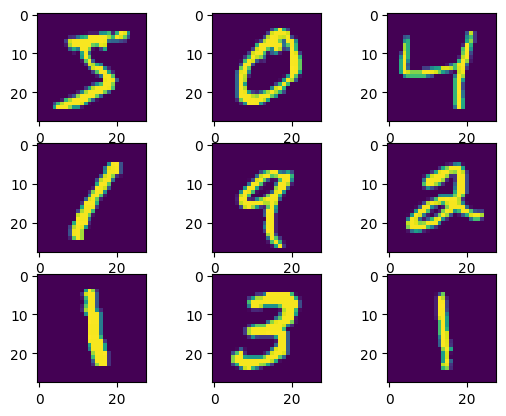

In [3]:
plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train_raw[i])

    #plt.ylabel(y[i].numpy())
    # plt.axis('off')
plt.show()

3.3.2.2 Data Preprocessing

An output of a fully connected network must be in the form of vector, instead of the matrix form of the current images. Therefore, you need to sort the images into vectors.

In [4]:
#Convert a 28 x 28 image into a 784 x 1 vector.
x_train = x_train_raw.reshape(60000, 784)
x_test = x_test_raw.reshape(10000, 784)

Currently, the dynamic range of pixels is 0 to 255. Image pixels are usually normalized to the range of 0 to 1 during processing of image pixel values.

In [5]:
#Normalize image pixel values.
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

3.3.3 DNN Construction

3.3.3.1 Building a DNN Model

In [6]:
#Create a deep neural network (DNN) model that consists of three fully connected layers and two RELU activation functions.
model = keras.Sequential([
layers.Dense(512, activation='relu', input_dim = 784),
layers.Dense(256, activation='relu'),
layers.Dense(124, activation='relu'),
layers.Dense(num_classes, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 124)               31868     
                                                                 
 dense_3 (Dense)             (None, 10)                1250      
                                                                 
Total params: 566,366
Trainable params: 566,366
Non-trainable params: 0
_________________________________________________________________


layer.Dense() indicates a fully connected layer, and activation indicates a used activation function.

3.3.3.2 Compiling the DNN Model

In [7]:
Optimizer = optimizers.Adam(0.001)
model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=Optimizer,
metrics=['accuracy'])

In the preceding example, the loss function of the model is cross entropy, and the optimization algorithm is the Adam gradient descent method.

3.3.3.3 Training the DNN Model

In [8]:
#Fit the training data to the model by using the fit method.
model.fit(x_train, y_train,
batch_size=128,
epochs=10,
verbose=1)

Epoch 1/10
469/469 [==============================] - 10s 19ms/step - loss: 0.2250 - accuracy: 0.9334
Epoch 2/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0828 - accuracy: 0.9751
Epoch 3/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0530 - accuracy: 0.9830
Epoch 4/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0410 - accuracy: 0.9868
Epoch 5/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0321 - accuracy: 0.9898
Epoch 6/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0258 - accuracy: 0.9911
Epoch 7/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0222 - accuracy: 0.9926
Epoch 8/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0154 - accuracy: 0.9947
Epoch 9/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0198 - accuracy: 0.9936
Epoch 10/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0164 - accur

Epoch indicates a specific round of training. In the preceding example, full data is iterated for 10 times.

3.3.3.4 Evaluating the DNN Model

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08620940893888474
Test accuracy: 0.978600025177002


The evaluation shows that the model accuracy reaches 0.87, and 10 training iterations have been performed.

3.3.3.5 Saving the DNN Model

In [10]:
# Create model folder under relative path.
model.save('./model/final_DNN_model.h5')

3.3.4 CNN Construction

The conventional CNN construction method helps you better understand the internal network structure but has a large code volume. Therefore, attempts to construct a CNN by using high-level APIs are made to simplify the network construction process.

3.3.4.1 Building a CNN Model

In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
model=keras.Sequential() #Create a network sequence.
##Add the first convolutional layer and pooling layer.
model.add(keras.layers.Conv2D(filters=32,kernel_size = 5,strides = (1,1),
padding = 'same',activation = tf.nn.relu,input_shape = (28,28,1)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))
##Add the second convolutional layer and pooling layer.
model.add(keras.layers.Conv2D(filters=64,kernel_size = 3,strides = (1,1),padding = 'same',activation = tf.nn.relu))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))
##Add a dropout layer to reduce overfitting.
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
##Add two fully connected layers.
model.add(keras.layers.Dense(units=128,activation = tf.nn.relu))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=10,activation = tf.nn.softmax))

In the preceding network, two convolutional layers and two pooling layers are first added by using keras.layers. Afterwards, a dropout layer is added to prevent overfitting. Finally, two fully connected layers are added.

3.3.4.2 Compiling and Training the CNN Model

In [12]:
#Expand data dimensions to adapt to the CNN model.
X_train=x_train.reshape(60000,28,28,1)
X_test=x_test.reshape(10000,28,28,1)
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
model.fit(x=X_train,y=y_train,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 92s 194ms/step - loss: 0.2817 - accuracy: 0.9125
Epoch 2/5
469/469 [==============================] - 90s 191ms/step - loss: 0.0907 - accuracy: 0.9731
Epoch 3/5
469/469 [==============================] - 90s 191ms/step - loss: 0.0710 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 91s 193ms/step - loss: 0.0589 - accuracy: 0.9826
Epoch 5/5
469/469 [==============================] - 90s 192ms/step - loss: 0.0522 - accuracy: 0.9847


3.3.4.3 Evaluating the CNN Model


In [13]:
test_loss,test_acc=model.evaluate(x=X_test,y=y_test)
print("Test Accuracy %.2f"%test_acc)

313/313 [==============================] - 5s 14ms/step - loss: 0.0256 - accuracy: 0.9911
Test Accuracy 0.99


3.3.4.4 Saving the CNN Model

In [14]:
model.save('./model/final_CNN_model.h5')

You can use tf.data to build training input pipelines for large datasets.

3.3.5 Prediction Result Visualization

3.3.5.1 Loading the CNN Model

In [15]:
from tensorflow.keras.models import load_model
new_model = load_model('./model/final_CNN_model.h5')
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)             

Visualize prediction results.

1/1 [==============================] - 0s 134ms/step
prediction results of the first 20 images:
7,2,1,0,4,	
1,4,9,5,9,	
0,6,9,0,1,	
5,9,7,3,4,	
first 20 images in the test set:


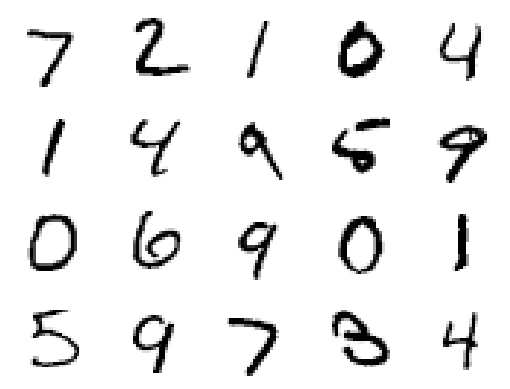

In [16]:
#Visualize test set output results.
import matplotlib.pyplot as plt
%matplotlib inline
def res_Visual(n):
    # final_opt_a=new_model.predict_classes(X_test[0:n])   #Perform predictions on the test set by using the model.

    #Perform predictions on the test set by using the model.
    # Update predict_classes is removed starting tf v2.6
    final_opt_a=new_model.predict(X_test[0:n])
    classes_x = np.argmax(final_opt_a,axis=1)

    fig, ax = plt.subplots(nrows=int(n/5),ncols=5 )
    ax = ax.flatten()
    print('prediction results of the first {} images:'.format(n))
    for i in range(n):
        # print(final_opt_a[i],end=',')
        print(classes_x[i],end=',')
        if int((i+1)%5) ==0:
            print('\t')
        #Visualize image display.
        img = X_test[i].reshape((28,28))#Read each row of data in the format of Ndarry.
        plt.axis("off")
        ax[i].imshow(img, cmap='Greys', interpolation='nearest') #Visualization
        # ax[i].imshow(img, cmap=plt.get_cmap('gray')) #, interpolation='nearest') #Visualization
        ax[i].axis("off")
    print('first {} images in the test set:'.format(n))
res_Visual(20)


## APS Coding Challenge #1 💪
####Topic 🧠
- Deep Learning

####What to do 🙀
- You will train a CNN model and predict handwritten digits with MNIST dataset

####How ⚙️
1. Open https://colab.research.google.com/
2. Download the attached notebook and upload it in colab (IMG 1)
3. `Ctrl+F9` or `Runtime > Run all` to execute all code cells (IMG2)
4. Skim through the results
5. In the last text cell, follow the instructions to complete the challenge

####When 🗓️
- You may start the challenge as soon as this announcement is posted.

####Deadline ⚠️
- July 17, 2023 at 1PM

####Submission 📃
- Upload your output on your designated Gdrive folder. Check your zimbra mail for the invite.
- Reply "Meow :cat-on-keyboard: " on this thread when done.
- Push the codes in your personal GitHub repo as part of your accomplishment 👍
- Submit feedback form that will be sent via zimbra mail.

####Rewards 🎉
🥇 +3 points for **First challenger** to send their output

🥈 +2 points for Challenger with the **best solution**

🥉 +1 point for **Succeeding challengers** to send their output

🎁 For the challenger with the **Best Solution** and included in the **First 5** to send the output

---

Note:
- Time spent for the challenge should be excluded from RM timelogs
- Do this only on your free time
- Project tasks should still be the priority

---
#Instructions

1. Save an image from `X_test` array from any index using `keras.utils.save_img`.
2. Load the saved image using `keras.utils.load_img` with `color_mode='grayscale'`
3. Convert the loaded image into an array using `keras.utils.img_to_array`
4. Reshape the image into `(1,28,28,1)`
5. Predict and get the classes similar with the previously defined function `res_Visual`
6. Print the classes which will be the result of the prediction
7. Show the input image with `plt.imshow`
---
Note:
- You can improve and be creative on how will you code the challenge.
- You can explore other approaches such as **Transfer Learning**
- Hope you enjoy, gain knowledge, and fire-up your neurons!

Happy Weekend! 🌟🍾🎉

### **Solution:**

(1, 28, 28, 1)
1/1 [==============================] - 0s 95ms/step
Prediction Result:
3
	


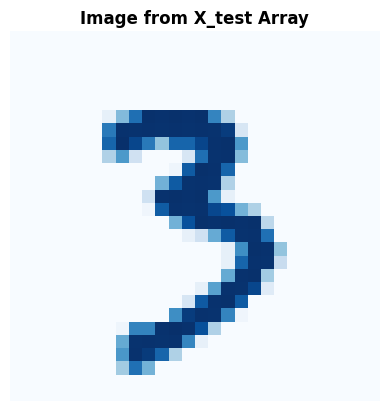

In [23]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import load_model

# Load CNN Model
new_model = load_model('./model/final_CNN_model.h5')

# Function for Solution (You can choose any index from Array X_test)
def predictFromXTest(i):
  # Prepare Data Based on Instructions
  tf.keras.utils.save_img('image.png',X_test[i])
  savedImage = tf.keras.utils.load_img('image.png', color_mode='grayscale')
  arrImg = tf.keras.utils.img_to_array(savedImage)
  reshapedArr = arrImg.reshape([1,28,28,1])
  print(reshapedArr.shape)

  #Visualize test set output results.
  predictArr = new_model.predict(reshapedArr[0:1])
  classes_x = np.argmax(predictArr, axis = 1)
  print('Prediction Result:')
  print(classes_x[0])
  print ('\t')
  imgArr = reshapedArr[0].reshape((28, 28))
  plt.axis('off')
  plt.imshow(imgArr, cmap = 'Blues', interpolation = 'nearest')
  plt.title('Image from X_test Array', fontweight = 'bold');

# Sample Usage
predictFromXTest(30)